In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import networkx as nx
import plotly.express as px


# 1. What are the most common medical procedures?

A hospital performs thousands of procedures every day, but which ones are the most common?

In [20]:
# Load procedures_icd data
d1 = files.upload()
procedures_icd = pd.read_csv("PROCEDURES_ICD.csv")

Saving PROCEDURES_ICD.csv to PROCEDURES_ICD.csv


In [22]:
procedures_icd

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,3994,10114,167957,1,3605
1,3995,10114,167957,2,3722
2,3996,10114,167957,3,8856
3,3997,10114,167957,4,9920
4,3998,10114,167957,5,9671
...,...,...,...,...,...
501,230170,41976,179418,2,3893
502,235193,41976,155297,1,3893
503,235194,41976,155297,2,966
504,238588,41976,125013,1,3893


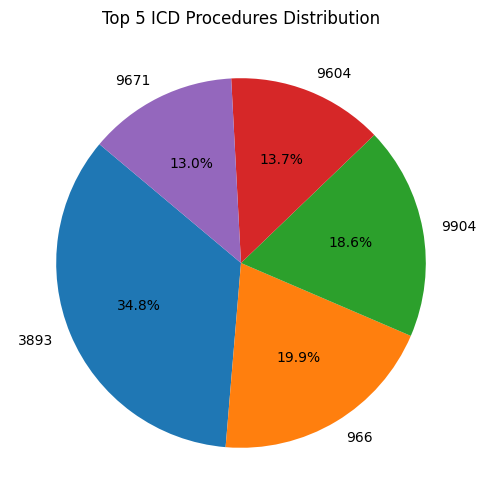

In [23]:
# Count occurrences of each procedure type
procedure_counts = procedures_icd['icd9_code'].value_counts().head(5)  # Top 5 procedures

# Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(procedure_counts, labels=procedure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 ICD Procedures Distribution")
plt.show()


This Pie Chart helps hospitals allocate resources efficiently, ensuring staff and equipment are available for frequently performed procedures.



# 2. Do most patients have normal Hemoglobin levels?

Hemoglobin levels are crucial indicators of anemia and oxygen-carrying capacity. A normal hemoglobin range varies by age, gender, and medical conditions

In [26]:
# Load lab events data
d2 = files.upload()
labevents = pd.read_csv("LABEVENTS.csv")

Saving LABEVENTS.csv to LABEVENTS (1).csv


In [99]:
# Selecting a specific test
d2_1 = files.upload()
d_labelitems = pd.read_csv("D_LABITEMS.csv")

Saving D_LABITEMS.csv to D_LABITEMS (3).csv


In [97]:
labevents.head()

,row_id_x,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,row_id_y,label,fluid,category,loinc_code
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN,83,Bicarbonate,Blood,Chemistry,1963-8
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN,94,"Calcium, Total",Blood,Chemistry,2000-8
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN,103,Chloride,Blood,Chemistry,2075-0
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal,113,Creatinine,Blood,Chemistry,2160-0


In [100]:
d_labelitems.head()

,row_id,itemid,label,fluid,category,loinc_code
0,1,50800,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
1,2,50801,Alveolar-arterial Gradient,Blood,Blood Gas,19991-9
2,3,50802,Base Excess,Blood,Blood Gas,11555-0
3,4,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6
4,5,50804,Calculated Total CO2,Blood,Blood Gas,34728-6


In [102]:
labels_events_id = labevents.merge(d_labelitems, on='itemid')
labels_events_id.head()

,row_id_x,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,row_id_y,label_x,fluid_x,category_x,loinc_code_x,row_id,label_y,fluid_y,category_y,loinc_code_y
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0,69,Anion Gap,Blood,Chemistry,1863-0
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN,83,Bicarbonate,Blood,Chemistry,1963-8,83,Bicarbonate,Blood,Chemistry,1963-8
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN,94,"Calcium, Total",Blood,Chemistry,2000-8,94,"Calcium, Total",Blood,Chemistry,2000-8
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN,103,Chloride,Blood,Chemistry,2075-0,103,Chloride,Blood,Chemistry,2075-0
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal,113,Creatinine,Blood,Chemistry,2160-0,113,Creatinine,Blood,Chemistry,2160-0


In [106]:
hemoglobin_data = labels_events_id[labels_events_id['label_y'] == "Hemoglobin"]
hemoglobin_data.head()

,row_id_x,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,row_id_y,label_x,fluid_x,category_x,loinc_code_x,row_id,label_y,fluid_y,category_y,loinc_code_y
17,6244580,10006,NaN,51222,2164-09-24 20:21:00,11.2,11.2,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7,422,Hemoglobin,Blood,Hematology,718-7
55,6244618,10006,NaN,51222,2164-09-25 05:25:00,11.1,11.1,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7,422,Hemoglobin,Blood,Hematology,718-7
92,6244655,10006,NaN,51222,2164-09-26 07:00:00,10.7,10.7,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7,422,Hemoglobin,Blood,Hematology,718-7
112,6244675,10006,NaN,51222,2164-09-27 05:30:00,10.0,10.0,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7,422,Hemoglobin,Blood,Hematology,718-7
156,6244719,10006,NaN,51222,2164-09-29 05:10:00,10.7,10.7,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7,422,Hemoglobin,Blood,Hematology,718-7


In [114]:
hemoglobin_data = labevents[labels_events_id['label_x'] == 'Hemoglobin']['value']

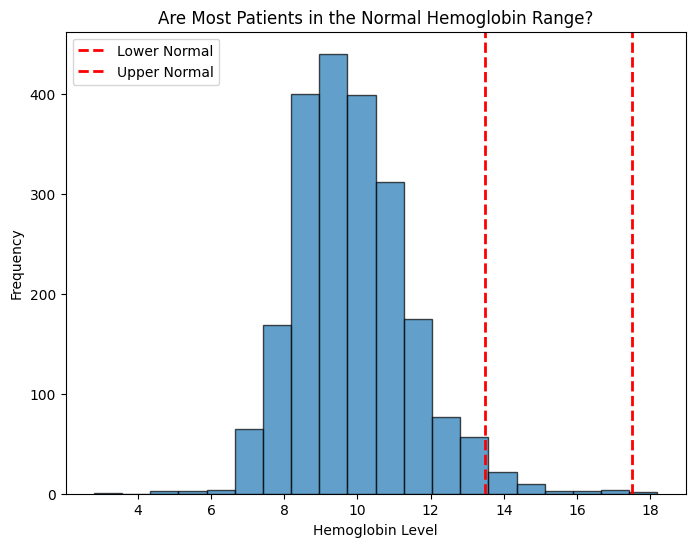

In [115]:
# Convert values to numeric (if needed)
hemoglobin_data = pd.to_numeric(hemoglobin_data, errors='coerce').dropna()

# Histogram visualization
plt.figure(figsize=(8, 6))
plt.hist(hemoglobin_data, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Hemoglobin Level")
plt.ylabel("Frequency")
plt.title("Are Most Patients in the Normal Hemoglobin Range?")
plt.axvline(x=13.5, color='r', linestyle='dashed', linewidth=2, label="Lower Normal")
plt.axvline(x=17.5, color='r', linestyle='dashed', linewidth=2, label="Upper Normal")
plt.legend()
plt.show()

In this Histogram, by comparing the distribution against normal levels (13.5–17.5 g/dL for adults), we can detect anemia or polycythemia trends in ICU patients.

# 3. Which medications are prescribed the most?

In [28]:

# Load prescription data
d3 = files.upload()
prescriptions = pd.read_csv("PRESCRIPTIONS.csv")

Saving PRESCRIPTIONS.csv to PRESCRIPTIONS (1).csv


In [52]:
prescriptions.head()

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


In [29]:
# Select top 10 medications
top_meds = prescriptions['drug'].value_counts().head(10).reset_index()
top_meds.columns = ['drug', 'count']

# Sunburst chart visualization
fig = px.sunburst(top_meds, path=['drug'], values='count', title="Top 10 Prescribed Medications in the ICU")
fig.show()

In this Sunburst chart we observe the drugs are commonly used, helping with formulary management and reducing medication errors.

# 4. How do different vital signs compare?

In [31]:
# Load prescription data
d4 = files.upload()
chartevents = pd.read_csv("CHARTEVENTS.csv")

Saving CHARTEVENTS.csv to CHARTEVENTS.csv


<ipython-input-31-f6c5ce4ae764>:3: DtypeWarning:

Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [50]:
# Define vital signs of interest (Heart Rate, Respiratory Rate, Systolic BP, Diastolic BP)
vital_signs = {
    220045: "Heart Rate",
    220046: "Respiratory Rate",
    220047: "Systolic BP",
    220048: "Diastolic BP"
}

# Filter for selected vital sign measurements
vital_data = chartevents[chartevents['itemid'].isin(vital_signs.keys())].copy()  # Ensure a copy

# Convert 'value' to numeric safely using .loc[]
vital_data.loc[:, 'value'] = pd.to_numeric(vital_data['value'], errors='coerce')

# Calculate mean values for each vital sign (dropping NaNs)
mean_vitals = vital_data.groupby('itemid')['value'].mean().dropna()

# Map item IDs to labels
labels = [vital_signs[itemid] for itemid in mean_vitals.index]
values = mean_vitals.values

# Convert to a circular format
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = np.append(values, values[0])  # Close the circular chart
angles.append(angles[0])  # Close the circular chart

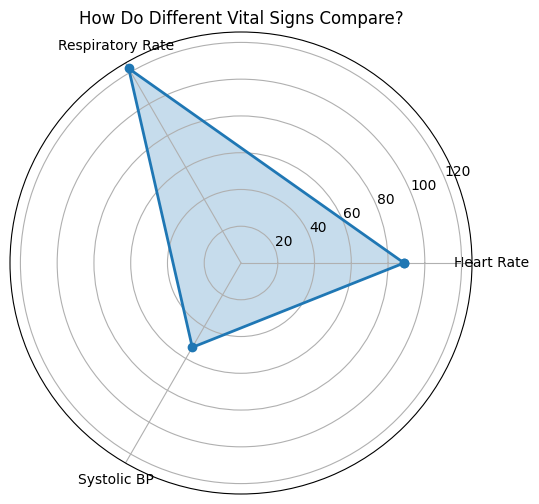

In [51]:
# Create radial plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("How Do Different Vital Signs Compare?")
plt.show()


This Radial Chart may help ICU staff quickly compare different vital signs to identify abnormal trends, making it easier to spot warning signs early.

# 5. How are different microbiology test results connected?

In [36]:
# Load microbiology events data
d5 = files.upload()
microbio = pd.read_csv("MICROBIOLOGYEVENTS.csv")

Saving MICROBIOLOGYEVENTS.csv to MICROBIOLOGYEVENTS.csv


In [41]:
microbio.head()

,row_id,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,134694,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,134695,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90015.0,VANCOMYCIN,2,=,2.0,S
2,134696,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90012.0,GENTAMICIN,<=0.5,<=,1.0,S
3,134697,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90025.0,LEVOFLOXACIN,4,=,4.0,I
4,134698,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90016.0,OXACILLIN,=>4,=>,4.0,R


In [44]:
# Select top organisms
top_organisms = microbio['org_name'].value_counts().head(5).index

# Filter data for these organisms
filtered_data = microbio[microbio['org_name'].isin(top_organisms)]

# Create edges (patient_id as a connection point)
edges = filtered_data[['subject_id', 'org_name']].dropna()


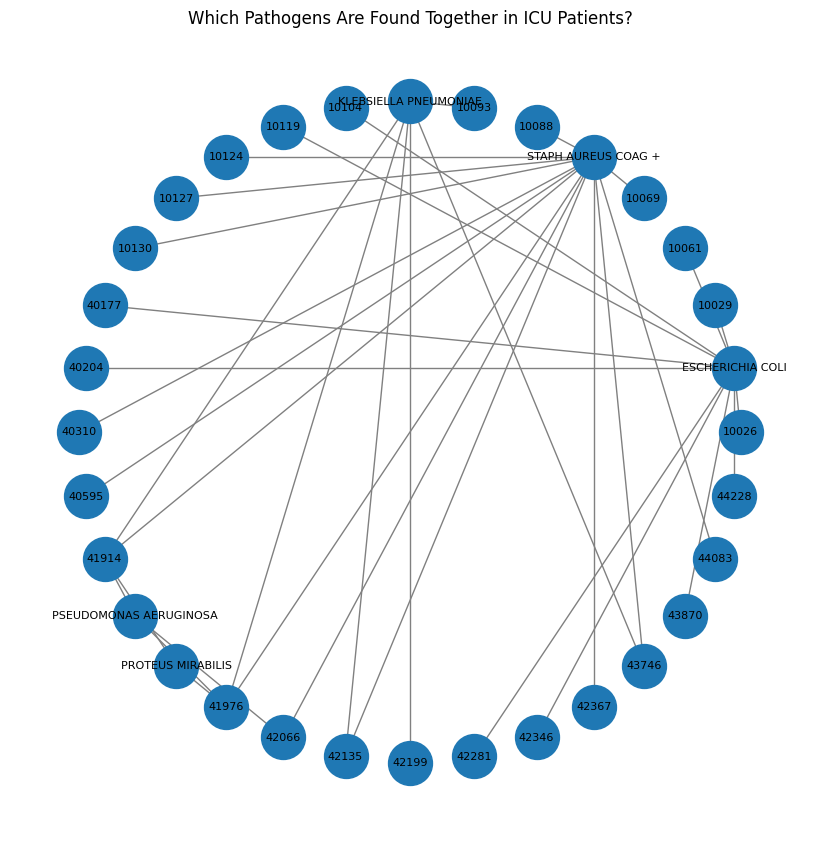

In [45]:
# Create graph
G = nx.Graph()
for _, row in edges.iterrows():
    G.add_edge(row['subject_id'], row['org_name'])

# Draw the chord diagram
plt.figure(figsize=(8, 8))
nx.draw_circular(G, with_labels=True, node_size=1000, font_size=8, edge_color="gray")
plt.title("Which Pathogens Are Found Together in ICU Patients?")
plt.show()


This Chord Diagram reveals patterns in bacterial co-occurrence, which can help doctors decide on appropriate antibiotic treatments and improve infection control policies.